# DATA 200 Graduate Project  

### Initial Data Processing 
### Running first model 

In [63]:
# !pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1) Import Data 
- Data from Topic 3/Dataset B: Amazon Recommendations
- We chose to view the data categorically chosing categories that are:
    - not too large (>2GB)
    - cover a wide range of items that capture the overall buying habits.
- Data is a json file.
- we used the 5-core dataset that removes any items with <5 reviews 

In [64]:
df = pd.read_json('../data/Original/Movies_and_TV_5.json', lines=True, encoding='latin-1')
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,So sorry I didn't purchase this years ago when...,Amazing!,1352419200,NaN,NaN
1,5,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,NaN,NaN
2,5,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"I have seen X live many times, both in the ear...",A great document of a great band,1114041600,11,NaN
3,5,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"I was so excited for this! Finally, a live co...",YES!! X LIVE!!,1112745600,5,NaN
4,5,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,X is one of the best punk bands ever. I don't ...,X have still got it,1291334400,5,NaN


# 2) Process Data: 
- we used the following functions to tidy the reviewText and summary
    - santize_text_reviews and sanitize_text_summary 
    - to_tidy_format_reviews and to to_tidy_format_summary 
- **Add polarity scores**:
    - we used the add_polarity_reviews and add_polarity_summary to calculate the polarity scores using VADER sentiment analysis 
    - add a column called polarity_reviews and polarity summary to the df
- We put it all together in the final function.
    - we also parsed the UNIX time to gather the year, day and month into integers 

In [65]:
def sanitize_text_reviews(df):
    df['clean_text_reviews'] = df['reviewText'].str.lower().str.replace(r"[^[a-zA-Z0-9_\t\n\r\s]", r" ", regex=True)
    return df

def sanitize_text_summary(df):
    df['clean_text_summary'] = df['summary'].str.lower().str.replace(r"[^[a-zA-Z0-9_\t\n\r\s]", r" ", regex=True)
    return df

def to_tidy_format_reviews(df):
    tidy_df_reviews = (
        df["clean_text_reviews"]
        .str.split()
        .explode()
        .to_frame()
        .rename(columns={"clean_text_reviews": "word"})
    )
    return tidy_df_reviews

def to_tidy_format_summary(df):
    tidy_df_summary = (
        df["clean_text_summary"]
        .str.split()
        .explode()
        .to_frame()
        .rename(columns={"clean_text_summary": "word"})
    )
    return tidy_df_summary

def add_polarity_reviews(df, tidy_df_reviews):
    df["polarity_reviews"] = (
        tidy_df_reviews
        .merge(sent, how='left', left_on='word', right_index=True)
        .reset_index()
        .loc[:, ['index', 'polarity']]
        .fillna(0)
        .groupby('index')
        .sum()
    )
    return df

def add_polarity_summary(df, tidy_df_summary):
    df["polarity_summary"] = (
        tidy_df_summary
        .merge(sent, how='left', left_on='word', right_index=True)
        .reset_index()
        .loc[:, ['index', 'polarity']]
        .fillna(0)
        .groupby('index')
        .sum()
    )
    return df

print(''.join(open("vader_lexicon.txt").readlines()[:10]))
sent = pd.read_csv("vader_lexicon.txt", sep='\t', header = None).loc[:, [0,1]].rename(columns={0: "token", 1: "polarity"}).set_index('token')
sent.head()

# Putting all the functions above together to parse through all the different categories 
# clean up the text in the reviews/summary 
# 1) translate the unixReviewTime and add day, month, year as columns.
# 2) sanitize text
# 3) tidy text 
# 4) calcuate and add polarity scores as columns 
# 5) rename and save the df

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [66]:
# Putting all the functions above together to parse through all the different categories 
# clean up the text in the reviews/summary 
# 1) translate the unixReviewTime and add day, month, year as columns.
# 2) sanitize text
# 3) tidy text 
# 4) calcuate and add polarity scores as columns 
# 5) rename and save the df
import gc
import os
list_files = os.listdir('../data/Original/')
for file in list_files:
    if file == 'Core_5_DATA.ipynb' or file == '.ipynb_checkpoints':
        continue
    if file == 'vader_lexicon.txt':
        continue
    else:
        path_file = f"../data/Original/{file}"
        df = pd.read_json(path_file, lines=True, encoding='latin-1')
        print(f"Working on file:  {file}")
        df['year'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.year
        df['month'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.month
        df['day'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.day
        df = sanitize_text_reviews(df)
        df = sanitize_text_summary(df)
        tidy_df_reviews = to_tidy_format_reviews(df)
        tidy_df_summary = to_tidy_format_summary(df)
        df = add_polarity_reviews(df, tidy_df_reviews)
        df = add_polarity_summary(df, tidy_df_summary)
        df = df[['year', 'month', 'day', 'overall', 'verified', 'reviewerID', 'reviewText', 'summary','vote', 'polarity_reviews', 'polarity_summary']]
        path_file = f"{file}_year_month_polarity.json"
        df.to_json(path_file)
        del df
        gc.collect()

Working on file:  Movies_and_TV_5.json
Working on file:  Kindle_Store_5.json
Working on file:  Patio_Lawn_and_Garden_5.json
Working on file:  Video_Games_5.json
Working on file:  Toys_and_Games_5.json
Working on file:  Tools_and_Home_Improvement_5.json
Working on file:  Sports_and_Outdoors_5.json


# 3) Reimport tidied Data with polarity scores 

- now that we have add polarity scores to each category, we can now do analysis.
- We will look at these categories:

OUTDOOR 
- 1) Lawn
  2) Sport
  3) Tools
 
INDOOR 
- 4) Toys
  5) Video_games
  6) Movies
  7) Kindle

In [67]:
# outdoor categories 
lawn= pd.read_json("Patio_Lawn_and_Garden_5.json_year_month_polarity.json", lines=False, encoding="latin-1")

sports = pd.read_json("Sports_and_Outdoors_5.json_year_month_polarity.json", lines=False, encoding="latin-1")

tools = pd.read_json("Tools_and_Home_Improvement_5.json_year_month_polarity.json", lines=False, encoding="latin-1")

In [68]:
# indoor categories
toys= pd.read_json("Toys_and_Games_5.json_year_month_polarity.json", lines=False, encoding="latin-1")

video_games = pd.read_json("Video_Games_5.json_year_month_polarity.json", lines=False, encoding="latin-1")

movies = pd.read_json("Movies_and_TV_5.json_year_month_polarity.json", lines=False, encoding="latin-1")

kindle = pd.read_json("Kindle_Store_5.json_year_month_polarity.json", lines=False, encoding="latin-1")

# 4) Delete Duplicates 

- using the pd.drop_duplicates() function to delete any duplicates in our data.

In [69]:
# 1. Drop Duplicates 

#outdoor 

lawn = lawn.drop_duplicates()

sports = sports.drop_duplicates()

tools = tools.drop_duplicates()

In [70]:
# 1. Drop Duplicates 

# indoor 

toys = toys.drop_duplicates()

video_games = video_games.drop_duplicates() 

movies = movies.drop_duplicates() 

kindle = kindle.drop_duplicates()

In [71]:
kindle.head()

,year,month,day,overall,verified,reviewerID,reviewText,summary,vote,polarity_reviews,polarity_summary
0,2014,7,3,4,True,A2LSKD2H9U8N0J,"pretty good story, a little exaggerated, but I...",pretty good story,None,16.2,4.1
1,2014,5,26,5,True,A2QP13XTJND1QS,"If you've read other max brand westerns, you k...",A very good book,None,1.7,1.9
2,2016,9,16,5,True,A8WQ7MAG3HFOZ,"Love Max, always a fun twist",Five Stars,None,5.5,0.0
3,2016,3,3,5,True,A1E0MODSRYP7O,"As usual for him, a good book",a good,None,1.9,1.9
4,2015,9,10,5,True,AYUTCGVSM1H7T,MB is one of the original western writers and ...,A Western,2,5.7,0.0


# 5) DATA PROCESSING and VISUALIZATION
- created two functions that will
    - data_processing(df): process the data, looking for the q1 and q3 values of the polarity scores of the reivews saved as "polarity reviews" and save only rows that have

        - polarity_reviews < q1 = "overly negative"

      - polarity_reviews > q3 = "overly positive"

        - then find the proportion of these over the total number of reviews for that year.
    - visualize: graphs the results of data_processing as a scatter plot.
- from the data sets we created above, the graphs are shown below with the appropriate title and axis labels. 

In [72]:
# for x-axis in graph 
year = toys.groupby("year", as_index = True)['year'].value_counts()
year = year.index
year = [i for i in year if i % 2 == 0]
year

[2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018]

In [73]:
# function to process data 
# Input: dataframe (string) 
# output: lower_prop (list), upper_prop (list) 

def data_processing(df): 
    # find the number of reviews per year 
    all_counts= df['year'].value_counts()
    
    # find the 1st and 3rd quantile of the polarity reivews
    q25 = df['polarity_reviews'].quantile(0.25)
    
    q75 = df['polarity_reviews'].quantile(0.75)
    
    # Find the values that are above and below that value 
    lower = df[df['polarity_reviews']<q25]
    
    upper = df[df['polarity_reviews']>q75]
    
    # Count the number of values in year that fall below q1 and above q3 
    lower_counts = lower['year'].value_counts()
    
    upper_counts = upper['year'].value_counts()
    
    # Find the proportion of the reviews for that year that are below q1 and above q3 
    lower_prop= lower_counts/  all_counts
    
    upper_prop= upper_counts/all_counts

    return lower_prop, upper_prop
        

In [74]:
# graph the results of the data_processing and saves the plot as a jpeg with appropriate name. 
def visualize(df, name): 
    lower_prop, upper_prop = data_processing(df) 
    plt.scatter(x=lower_prop.index, y=lower_prop.values, label='values < q1')
    plt.scatter(x=upper_prop.index, y=upper_prop.values,label='values > q3')
    plt.ylim(0,1.2)
    plt.xlim(1998,2020 )
    plt.xticks(year)
    plt.legend()
    plt.title(f"Dataframe: {name} \n Proportion of Reviews that were overly negative or positive")
    plt.ylabel("Proportion of Reviews")
    plt.xlabel("Year")
    plt.savefig(f"{name}_plot.jpg", format='jpeg')
    #plt.show()

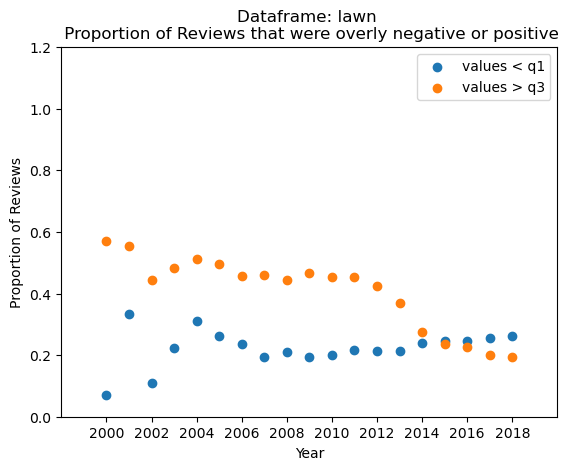

In [75]:
data_processing(lawn)
visualize(lawn, "lawn")

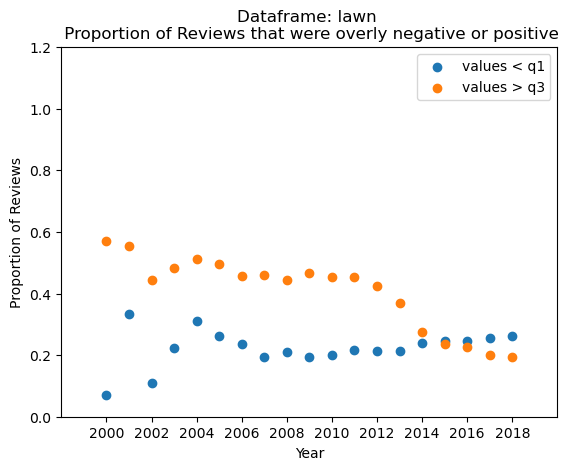

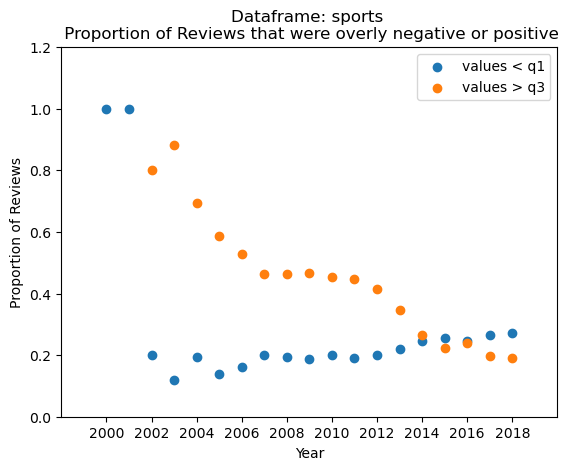

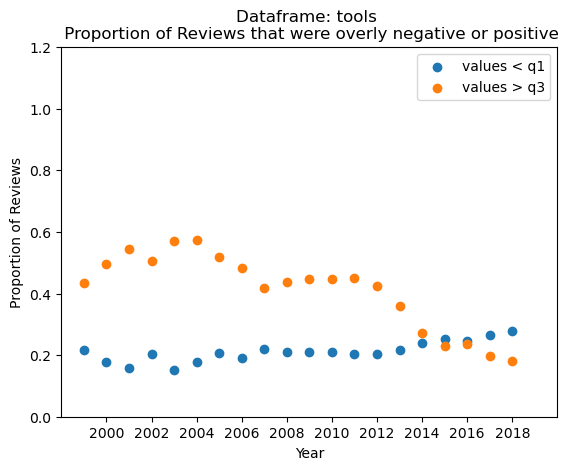

In [76]:
## 2. Data Processing 

# OUTDOOR
# 1) Lawn
visualize(lawn, "lawn") 

plt.figure()

# 2) sport 
visualize(sports, "sports")

plt.figure()

# 3) Tools 
visualize(tools, "tools")



<Figure size 640x480 with 0 Axes>

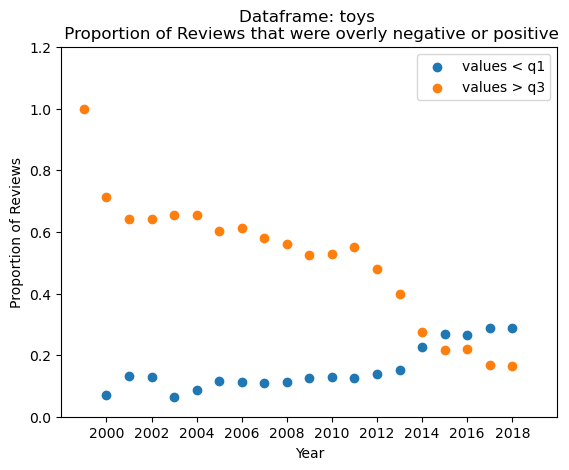

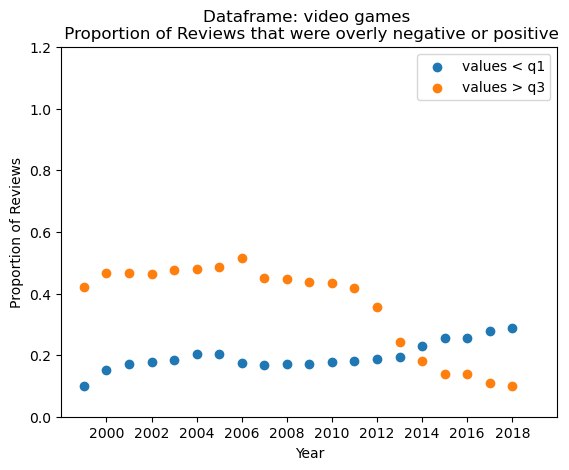

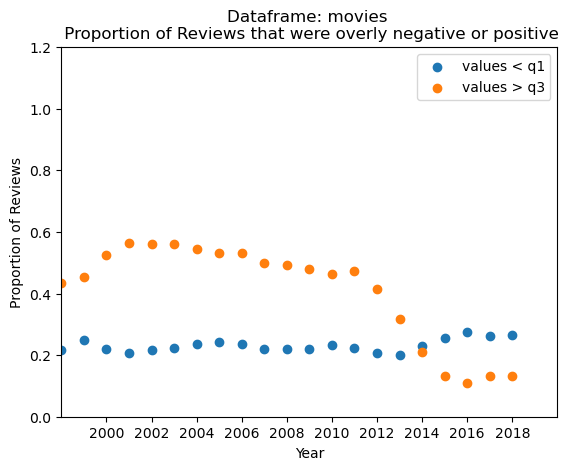

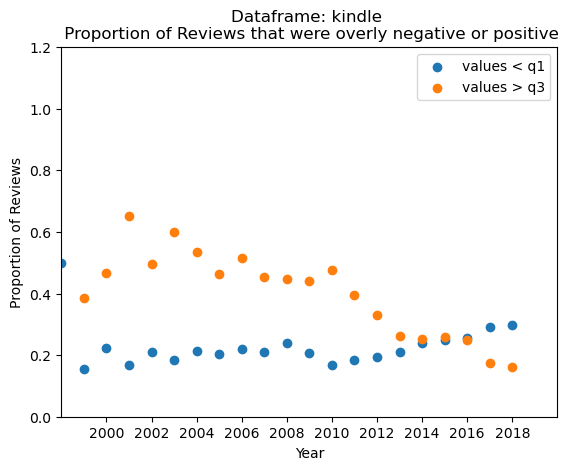

<Figure size 640x480 with 0 Axes>

In [77]:
## 2. Data Processing 

# OUTDOOR
# 1) Toys 
visualize(toys, "toys")
plt.figure()

# 2) Video Games 
visualize(video_games, "video games")
plt.figure()

#3) Movies 
visualize(movies, "movies")
plt.figure()

#4) Kindle 
visualize(kindle, "kindle")
plt.figure()


# 6) Summary Statistics: 
- we found the number of reviewers(reviewerID), number of reviews (reviewerText) and median polarity scores of the review text (polarity_reviews) for each data set.

In [78]:
def sum_stats(df): 
    print(len(df['reviewerID'].unique()))
    print(len(df['reviewText'].unique()))
    print(np.median(df['polarity_reviews'].unique()))

In [79]:
sum_stats(lawn)

103431
640924
19.55


In [80]:
sum_stats(sports)

332447
2295190
38.25


In [81]:
sum_stats(tools)

240806
1674279
32.9


In [82]:
sum_stats(toys)

208180
1461182
40.650000000000006


In [83]:
sum_stats(video_games)

55223
401499
39.849999999999994


In [84]:
sum_stats(movies)

297529
2645768
44.6


In [85]:
sum_stats(kindle)

139824
2114481
52.9


# 7 Linear Modeling of Proportions of Overally Polarizing Reviews

OUTDOOR 
- 1) Lawn
  2) Sport
  3) Tools
 
INDOOR 
- 4) Toys
  5) Video_games
  6) Movies
  7) Kindle


In [86]:
outdoors = pd.concat([lawn, sports, tools])

indoor = pd.concat([toys,video_games,movies,kindle])



In [87]:
data = pd.concat([outdoors, indoor])

In [88]:
data["year"].value_counts()

year
2016    2858068
2015    2716044
2014    1946877
2017    1683518
2013    1090839
2018     658369
2012     385667
2011     196341
2010     129337
2009     113514
2008      95619
2007      77963
2005      62332
2006      58751
2004      52744
2003      39925
2002      37883
2001      30187
2000      21548
1999       3506
1998        210
1997          2
Name: count, dtype: int64

In [89]:
outdoors.head()

,year,month,day,overall,verified,reviewerID,reviewText,summary,vote,polarity_reviews,polarity_summary
0,2011,12,11,5,True,AUVPE2KEXBJVT,I don't spend a lot on my flags because they r...,Good quality for the price,2,5.1,1.9
1,2011,7,30,5,True,A2F6GES1MBOFXS,"Super fast processing and shipping, if you are...",3'x5' Colorado State flag,None,6.7,0.0
2,2016,5,4,5,True,A1SDVD3SZI1BAK,Great product. I would recommend this product...,Colorado Flag,None,6.1,0.0
3,2015,11,2,5,True,A1ZQJ3KCSLUPR3,GREAT PRICE I LOVE MY STATE AND COUNTRY,RETIRED MILITARY,None,6.3,0.0
4,2015,9,1,5,True,ANU8FBZM618M3,Great display flag for the den.,Five Stars,None,3.1,0.0


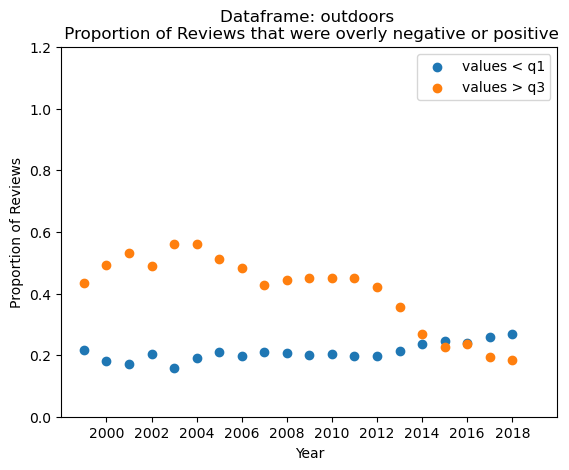

In [90]:
data_processing(outdoors)
visualize(outdoors, "outdoors")

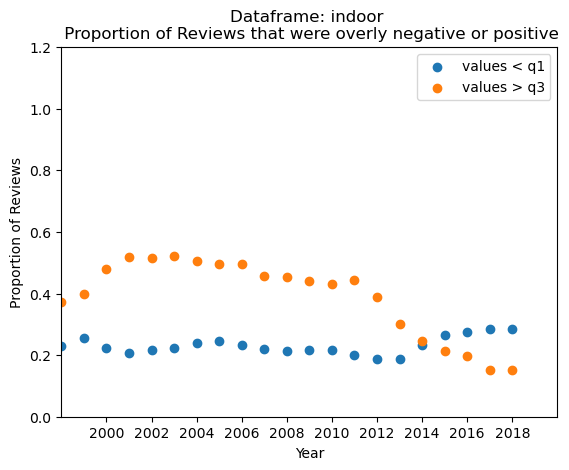

In [91]:
data_processing(indoor)
visualize(indoor, "indoor")

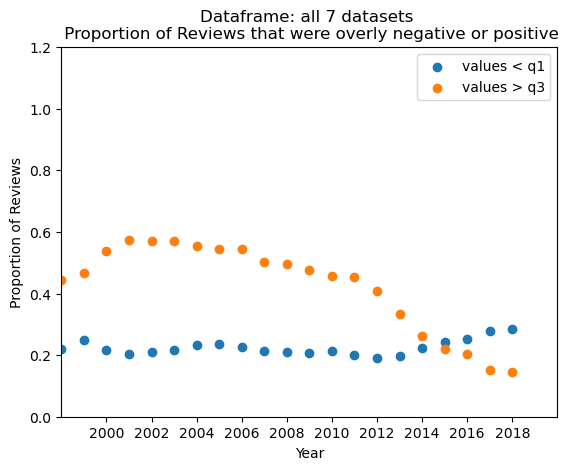

In [92]:
lower, upper = data_processing(data)
visualize(data, "all 7 datasets")

In [93]:
# Only include years after 2000 
lower_2000 = pd.DataFrame(lower[3:]).reset_index()
upper_2000 = pd.DataFrame(upper[3:]).reset_index()

In [94]:
lower_2000.head()

,year,count
0,2000,0.215890
1,2001,0.202074
2,2002,0.210464
3,2003,0.215930
4,2004,0.231249


# Simple Linear Regression Model 

X = year

Y = proportion of negative or positive reviews


proportion  =  t0 + t1 * (year)

In [95]:
def theta_1(x, y):
    r = x.corr(y)
    return r * y.std() / x.std()
def theta_0(x, y):
    return y.mean() - theta_1(x, y) * x.mean()


In [96]:
t1_lower = theta_1(lower_2000['year'], lower_2000['count'])
t0_lower = theta_0(lower_2000['year'], lower_2000['count'])

print(f'(Lower) Model: {t0_lower:.2f} + {t1_lower:.2f}*Year')

t1_upper = theta_1(upper_2000['year'], upper_2000['count'])
t0_upper = theta_0(upper_2000['year'], upper_2000['count'])

print(f'(Upper) Model: {t0_upper:.2f} + {t1_upper:.2f}*Year')


(Lower) Model: -4.53 + 0.00*Year
(Upper) Model: 51.18 + -0.03*Year


~~~ Overly Negative Reviews ~~~
(Lower) Model: -4.53 + 0.00*Year
Correlation Coefficient: 0.5209554836277837
model SD = 0.021832813006335078
actual SD = 0.025577818839695718
percent decrese of SD: 14.64161528718213%


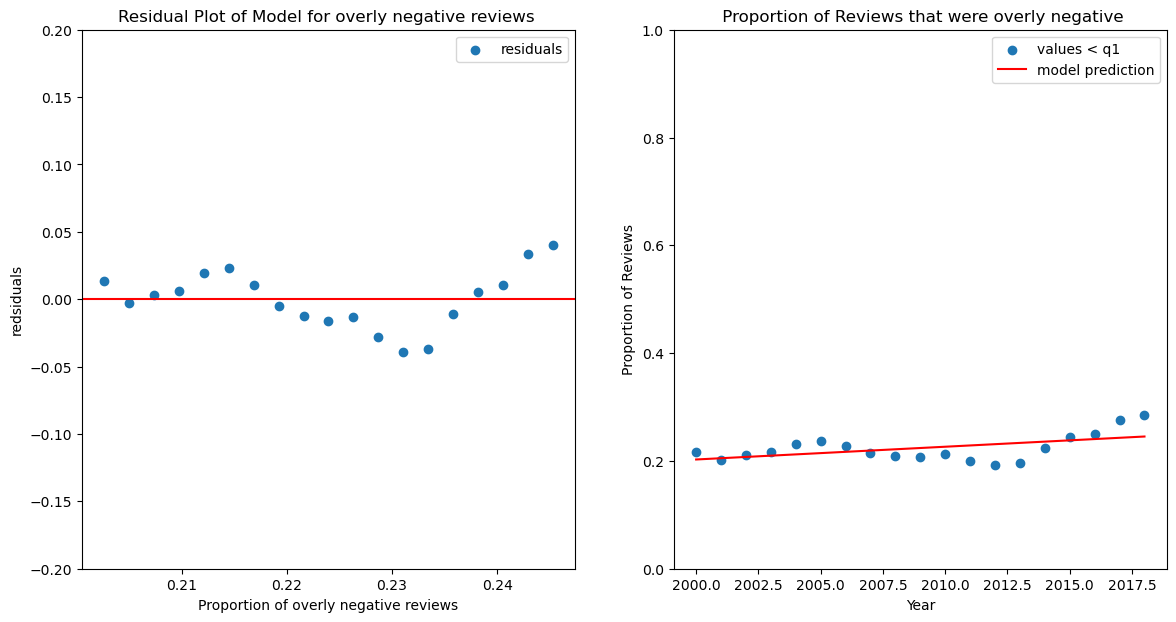

In [97]:
# Model for values < q1 
print("~~~ Overly Negative Reviews ~~~")
print(f'(Lower) Model: {t0_lower:.2f} + {t1_lower:.2f}*Year')
# Calculate t0 and t1 
prediction_lower = t0_lower + t1_lower * lower_2000['year']
error_lower = lower_2000['count'] - prediction_lower
fit = pd.DataFrame(dict(prediction=prediction_lower, error=error_lower))

# Residual Plot
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
fig = plt.scatter(fit.prediction,fit.error, label="residuals")
plt.xlabel("Proportion of overly negative reviews")
plt.ylabel("redsiduals")
plt.ylim(-0.2, 0.2)
plt.title("Residual Plot of Model for overly negative reviews ")
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()

# Plot with poiints and model prediction
plt.subplot(1,2,2)
plt.scatter(x=lower_2000["year"], y=lower_2000["count"], label='values < q1')
plt.plot(lower_2000["year"],prediction_lower, label="model prediction", color="red")
plt.ylim(0,1)
plt.title(" Proportion of Reviews that were overly negative")
plt.ylabel("Proportion of Reviews")
plt.xlabel("Year")
plt.legend()

# Asses Model Fit 
# Correlation Coefficients 
correlation_matrix = np.corrcoef(lower_2000["year"], y=lower_2000["count"])
correlation_coefficient = correlation_matrix[0, 1]
print("Correlation Coefficient:", correlation_coefficient)
model_SD = error_lower.std()
pro_SD = lower_2000['count'].std()

print(f"model SD = {model_SD}")
print(f"actual SD = {pro_SD}")

decrease = (1-(model_SD/pro_SD))*100

print(f"percent decrese of SD: {decrease}%")

    

~~~ Overly Positive Reviews ~~~
(Upper) Model: 51.18 + -0.025*Year
Correlation Coefficient: -0.9363500784835717
model SD = 0.0533018430622533
actual SD = 0.15182781823953914
percent decrese of SD: 64.8932299230179%


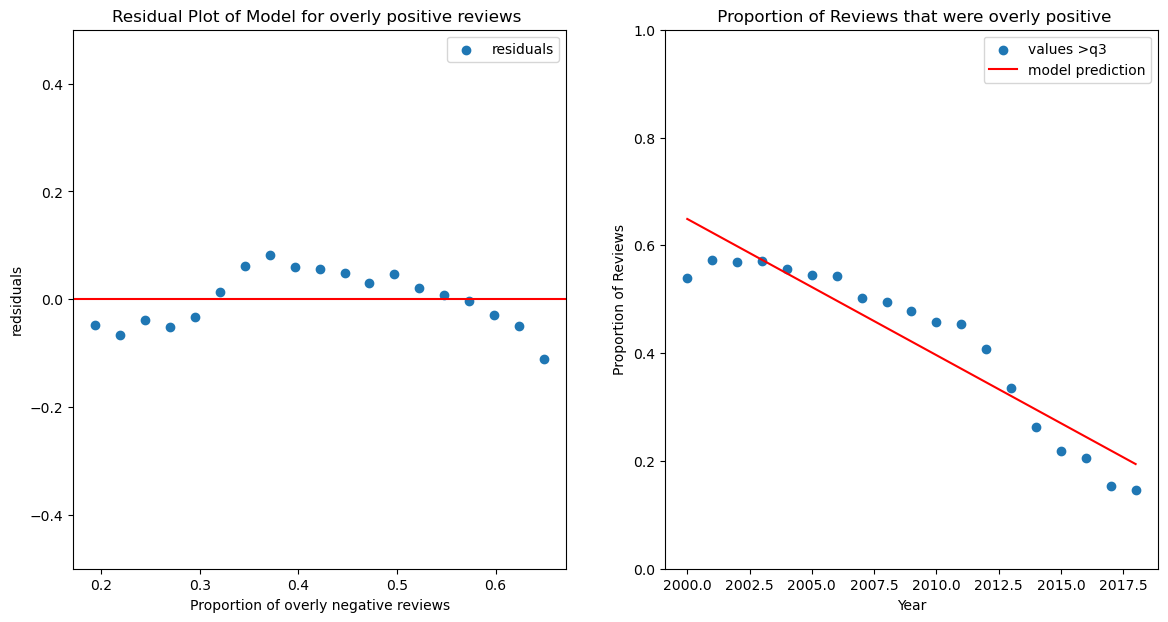

In [98]:
# Model for values > q3
print("~~~ Overly Positive Reviews ~~~")
print(f'(Upper) Model: {t0_upper:.2f} + {t1_upper:.3f}*Year')
# Calculate t0 and t1 
prediction_up = t0_upper + t1_upper * upper_2000['year']
error_up = upper_2000['count'] - prediction_up
fit = pd.DataFrame(dict(prediction=prediction_up, error=error_up))

# Residual Plot
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
fig = plt.scatter(fit.prediction,fit.error,label="residuals")
plt.xlabel("Proportion of overly negative reviews")
plt.ylabel("redsiduals")
plt.title("Residual Plot of Model for overly positive reviews ")
plt.legend()
plt.axhline(y=0, color='r', linestyle='-')
plt.ylim(-0.5, 0.5)

# Plot with poiints and model prediction
plt.subplot(1,2,2)
plt.scatter(x=upper_2000["year"], y=upper_2000["count"], label='values >q3')
plt.plot(upper_2000["year"],prediction_up, label="model prediction", color='red')
plt.ylim(0,1)
plt.legend()
plt.title(" Proportion of Reviews that were overly positive")
plt.ylabel("Proportion of Reviews")
plt.xlabel("Year")

# Asses Model Fit 
# Correlation Coefficients 
correlation_matrix = np.corrcoef(upper_2000["year"], y=upper_2000["count"])
correlation_coefficient = correlation_matrix[0, 1]
print("Correlation Coefficient:", correlation_coefficient)

model_SD = error_up.std()
pro_SD = upper_2000['count'].std()

print(f"model SD = {model_SD}")
print(f"actual SD = {pro_SD}")

decrease = (1-(model_SD/pro_SD))*100

print(f"percent decrese of SD: {decrease}%")

# 8) Additional thoughts: 
- We initially looked at the polarity scores by month to see if there were any seasonal changes with the polarity of the reviews
    - ie: lawn related items will be more reviewed in a positive or negatively in the summer when these items are most commonly used.
    - There was no noticable difference in the proportion of overly negative and positive reviews.
    - Below includes, our analysis of 3 data sets that did not seem to have any noticeable difference in proportions of overly positive/negative reviews by month or between each other. 
- Test for the data_processing and visualize functions to validate its function 

In [99]:
# similar functions as before, just with months instead of years. 
def data_processing_month(df): 
    # find the number of reviews per year 
    all_counts= df['month'].value_counts()
    
    # find the 1st and 3rd quantile of the polarity reivews
    q25 = df['polarity_reviews'].quantile(0.25)
    
    q75 = df['polarity_reviews'].quantile(0.75)
    
    # Find the values that are above and below that value 
    lower = df[df['polarity_reviews']<q25]
    
    upper = df[df['polarity_reviews']>q75]
    
    # Count the number of values in year that fall below q1 and above q3 
    lower_counts = lower['month'].value_counts()
    
    upper_counts = upper['month'].value_counts()
    
    # Find the proportion of the reviews for that year that are below q1 and above q3 
    lower_prop= lower_counts/  all_counts
    
    upper_prop= upper_counts/all_counts

    return lower_prop, upper_prop
# plot the data. 
def visualize_months(df, name): 
    lower_prop, upper_prop = data_processing_month(df)
    plt.scatter(x=lower_prop.index, y=lower_prop.values, label='values < q1')
    plt.scatter(x=upper_prop.index, y=upper_prop.values,label='values > q3')
    plt.ylim(0,1)
    plt.title(f"Dataframe: {name} \n Proportion of Reviews that were overly negative or positive by month")
    plt.ylabel("Proportion of Reviews")
    plt.xlabel("Month")
    plt.legend()
    """plt.xlim(1998,2020 )
    plt.xticks(year)
    plt.legend()
    plt.savefig(f"{name}_plot.jpg", format='jpeg')
    plt.show()"""
    

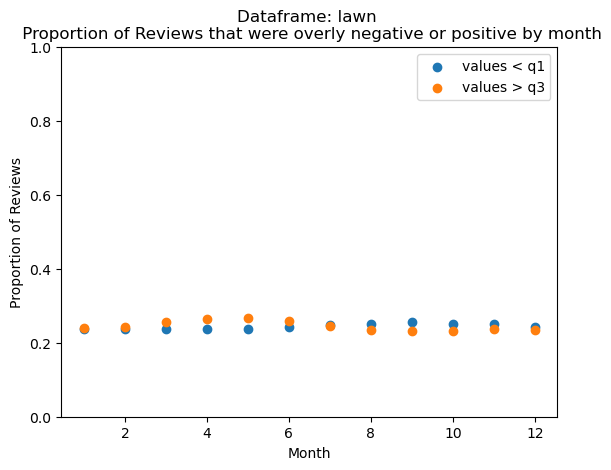

In [100]:
visualize_months(lawn, 'lawn')

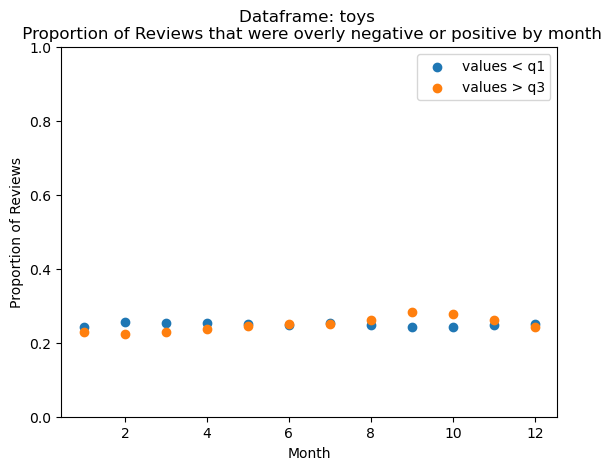

In [101]:
visualize_months(toys,"toys")

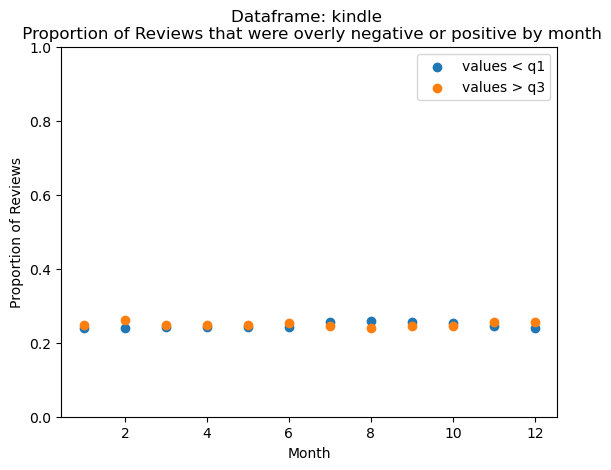

In [102]:
visualize_months(kindle,"kindle")

In [103]:
# VALIDATE THAT THE FUNCTION data processing WORKS

# 1) Lawn

# find the number of reviews per year 
lawn_all_counts= lawn['year'].value_counts()

# find the 1st and 3rd quantile of the polarity reivews
q25 = lawn['polarity_reviews'].quantile(0.25)

q75 = lawn['polarity_reviews'].quantile(0.75)

# Find the values that are above and below that value 
lawn_lower = lawn[lawn['polarity_reviews']<q25]

lawn_upper = lawn[lawn['polarity_reviews']>q75]

# Count the number of values in year that fall below q1 and above q3 
lawn_lower_counts=lawn_lower['year'].value_counts()

lawn_upper_counts=lawn_upper['year'].value_counts()

# Find the proportion of the reviews for that year that are below q1 and above q3 
lawn_lower_prop= lawn_lower_counts/lawn_all_counts

lawn_upper_prop= lawn_upper_counts/lawn_all_counts
#lawn_lower_prop, lawn_upper_prop

Text(0.5, 0, 'Year')

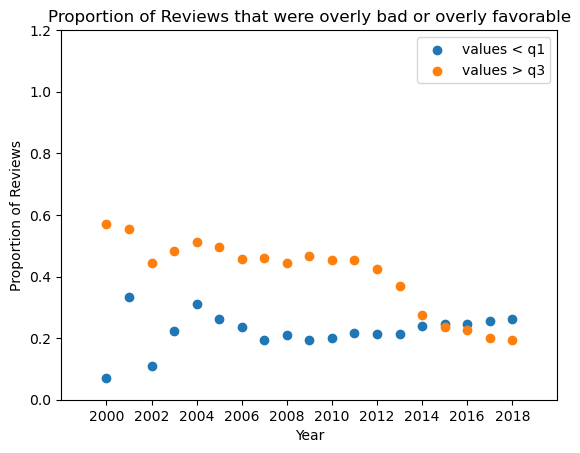

In [104]:
# Visualize with a scatter plot y=proportion, x=year

plt.scatter(x=lawn_lower_prop.index, y=lawn_lower_prop.values, label='values < q1')
plt.scatter(x=lawn_upper_prop.index, y=lawn_upper_prop.values,label='values > q3')
plt.ylim(0,1)
plt.xlim(1998,2020 )
plt.ylim(0,1.2)
plt.xticks(year)
plt.legend()
plt.title("Proportion of Reviews that were overly bad or overly favorable")
plt.ylabel("Proportion of Reviews")
plt.xlabel("Year")